In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ecommerce_Delivery_Analytics_New.csv')

In [3]:
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [4]:
df.shape

(100000, 11)

In [5]:
df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [7]:
df.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


In [8]:
df.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns.tolist()

['Order ID',
 'Customer ID',
 'Platform',
 'Order Date & Time',
 'Delivery Time (Minutes)',
 'Product Category',
 'Order Value (INR)',
 'Customer Feedback',
 'Service Rating',
 'Delivery Delay',
 'Refund Requested']

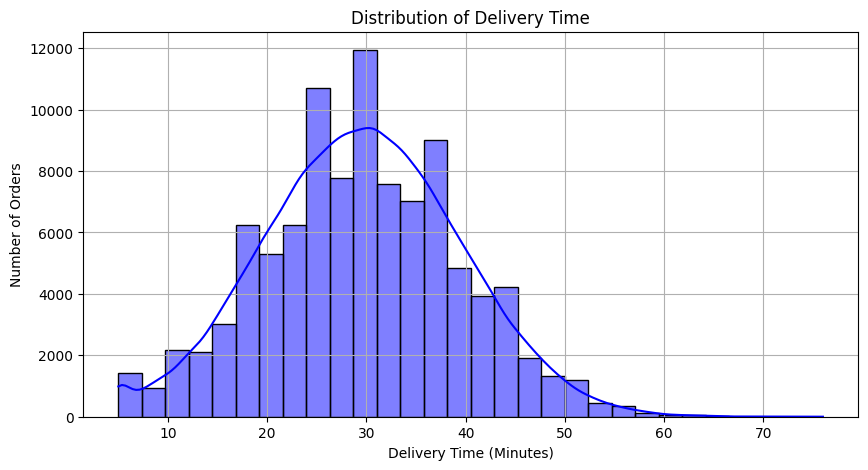

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Delivery Time (Minutes)'], kde = True , color = 'Blue', bins = 30)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15344\3188689757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Platform', y='Delivery Time (Minutes)', estimator=np.mean, palette='Set3', legend = False )


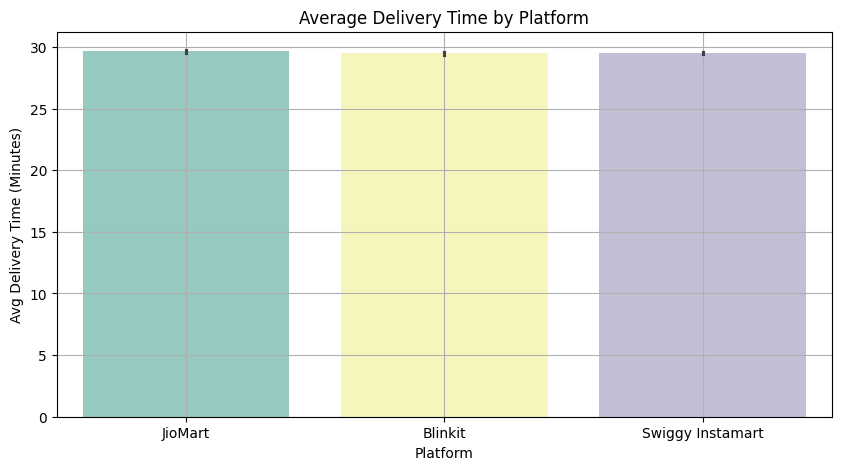

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Platform', y='Delivery Time (Minutes)', estimator=np.mean, palette='Set3', legend = False )
plt.title('Average Delivery Time by Platform')
plt.ylabel('Avg Delivery Time (Minutes)')
plt.grid(True)
plt.show()

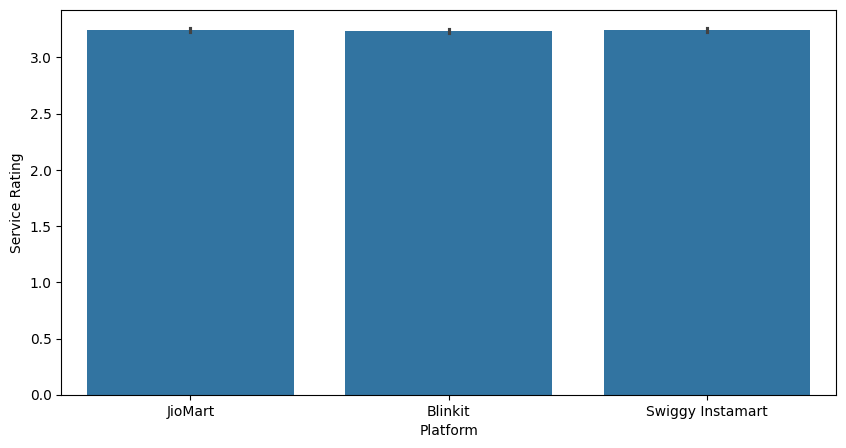

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data = df, x='Platform', y='Service Rating')
plt.show()

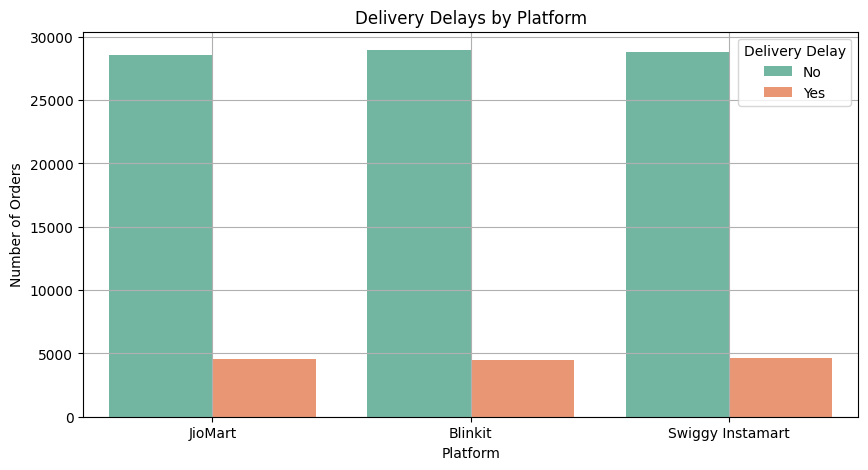

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Platform', hue='Delivery Delay', palette='Set2')
plt.title('Delivery Delays by Platform')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

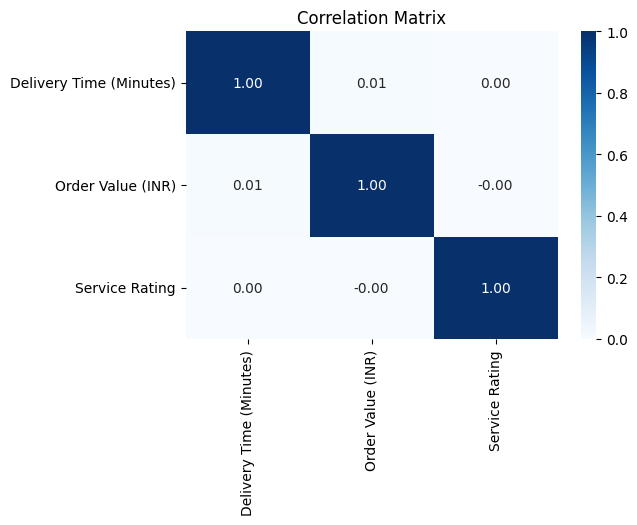

In [15]:
# Select numeric columns and calculate correlation
corr = df[['Delivery Time (Minutes)', 'Order Value (INR)', 'Service Rating']].corr()

# Plot correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

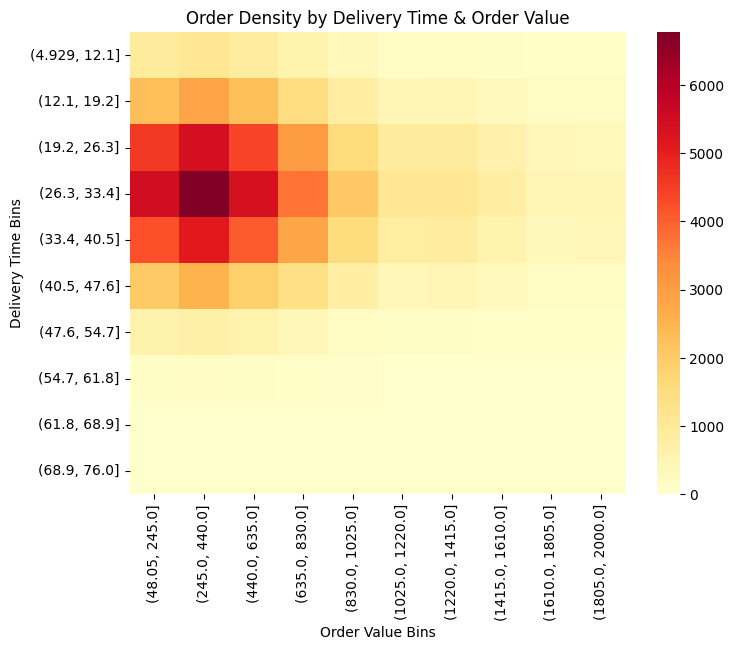

In [16]:
# Create bins for Delivery Time and Order Value
time_bins = pd.cut(df['Delivery Time (Minutes)'], bins=10)
value_bins = pd.cut(df['Order Value (INR)'], bins=10)

# Create a pivot table counting occurrences
pivot_table = pd.crosstab(time_bins, value_bins)

# Plot density heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Order Density by Delivery Time & Order Value')
plt.xlabel('Order Value Bins')
plt.ylabel('Delivery Time Bins')
plt.show()

In [17]:
# Assume df has: 'Order Value (INR)', 'Delivery Time (Minutes)', 'Platform', 'Service Rating'

# Drop missing values
df = df[['Order Value (INR)', 'Delivery Time (Minutes)', 'Platform', 'Service Rating']].dropna()

# Delivery Speed categories
df['Delivery Speed'] = pd.cut(
    df['Delivery Time (Minutes)'],
    bins=[-np.inf, 20, 40, np.inf],
    labels=['Fast (<20)', 'Medium (20–40)', 'Slow (>40)']
)

# ---------------- ANOVA (Manual) ----------------
print("\n=== ANOVA: Price across Platforms ===")

groups = [g['Order Value (INR)'].values for _, g in df.groupby('Platform')]

# overall mean
grand_mean = df['Order Value (INR)'].mean()

# Between-group sum of squares
ss_between = sum(len(g) * (g.mean() - grand_mean) ** 2 for g in groups)

# Within-group sum of squares
ss_within = sum(((g - g.mean()) ** 2).sum() for g in groups)

df_between = len(groups) - 1
df_within = len(df) - len(groups)

ms_between = ss_between / df_between
ms_within = ss_within / df_within

F = ms_between / ms_within

print(f"F-statistic = {F:.3f}")
print("Note: Without scipy we can't calculate exact p-value, but higher F means stronger difference.")

# ---------------- Chi-Square (Manual) ----------------
print("\n=== Chi-Square: Delivery Speed vs Platform ===")

contingency = pd.crosstab(df['Platform'], df['Delivery Speed'])
observed = contingency.values
row_totals = observed.sum(axis=1).reshape(-1, 1)
col_totals = observed.sum(axis=0).reshape(1, -1)
grand_total = observed.sum()

expected = row_totals.dot(col_totals) / grand_total
chi2 = ((observed - expected) ** 2 / expected).sum()

print("Contingency Table:\n", contingency)
print(f"Chi-Square = {chi2:.3f}")
print("Note: Without scipy we can’t compute exact p-value, but higher Chi2 means stronger association.")

# ---------------- Correlation (Manual Pearson) ----------------
print("\n=== Correlation: Delivery Time vs Rating ===")

x = df['Delivery Time (Minutes)'].values
y = df['Service Rating'].values

# Pearson correlation manually
x_mean, y_mean = x.mean(), y.mean()
num = ((x - x_mean) * (y - y_mean)).sum()
den = np.sqrt(((x - x_mean) ** 2).sum() * ((y - y_mean) ** 2).sum())
r = num / den

print(f"Pearson r = {r:.3f}")
print("Note: r close to -1 or 1 shows strong correlation, near 0 means weak.")



=== ANOVA: Price across Platforms ===
F-statistic = 0.571
Note: Without scipy we can't calculate exact p-value, but higher F means stronger difference.

=== Chi-Square: Delivery Speed vs Platform ===
Contingency Table:
 Delivery Speed    Fast (<20)  Medium (20–40)  Slow (>40)
Platform                                                
Blinkit                 6197           22754        4473
JioMart                 6053           22494        4580
Swiggy Instamart        6223           22607        4619
Chi-Square = 4.807
Note: Without scipy we can’t compute exact p-value, but higher Chi2 means stronger association.

=== Correlation: Delivery Time vs Rating ===
Pearson r = 0.000
Note: r close to -1 or 1 shows strong correlation, near 0 means weak.


=== Order Count per Platform ===
Platform
Swiggy Instamart    33449
Blinkit             33424
JioMart             33127
Name: count, dtype: int64


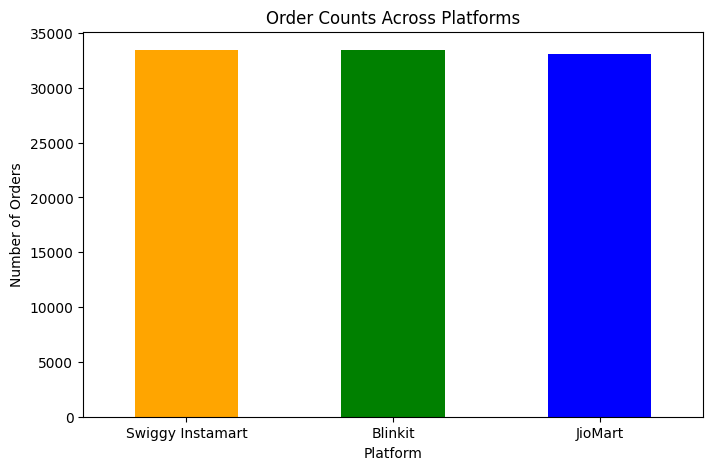

In [18]:
order_counts = df['Platform'].value_counts()

# Print table
print("=== Order Count per Platform ===")
print(order_counts)

# Plot
plt.figure(figsize=(8,5))
order_counts.plot(kind='bar', color=['orange','green','blue'])
plt.title("Order Counts Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.show()

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')
=== Orders per Product Category ===
Product Category
Dairy                  16857
Grocery                16737
Snacks                 16705
Fruits & Vegetables    16632
Beverages              16536
Personal Care          16533
Name: count, dtype: int64


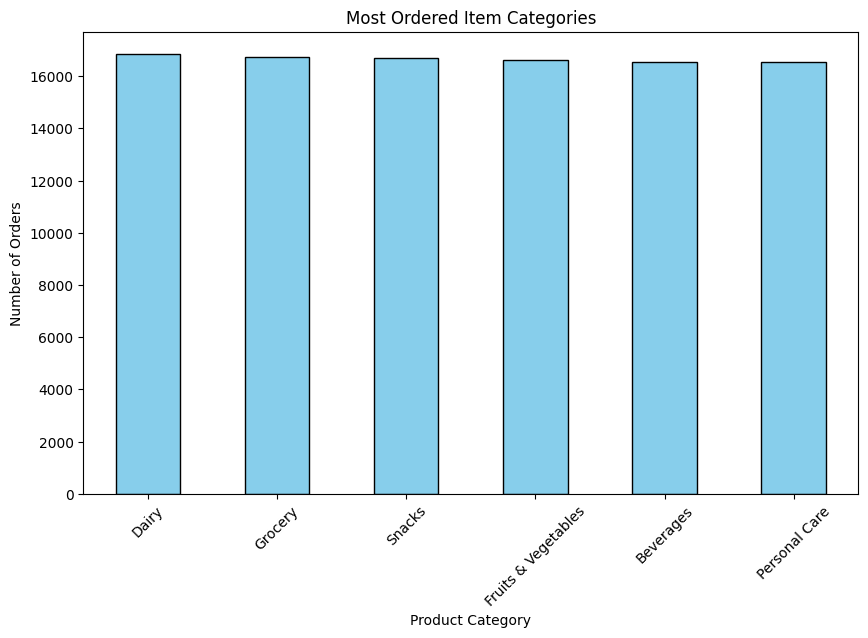

In [19]:


# Load again to make sure all columns are present
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")

# Strip spaces in column names
df.columns = df.columns.str.strip()

# Check columns
print(df.columns)

# Count orders by Product Category
category_counts = df['Product Category'].value_counts()

print("=== Orders per Product Category ===")
print(category_counts)

# Bar chart
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Most Ordered Item Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


In [20]:
df.head()


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


=== Average Delivery Time by Product Category (in Minutes) ===
Product Category
Grocery                29.580689
Personal Care          29.571584
Dairy                  29.560657
Fruits & Vegetables    29.551467
Beverages              29.503568
Snacks                 29.448668
Name: Delivery Time (Minutes), dtype: float64


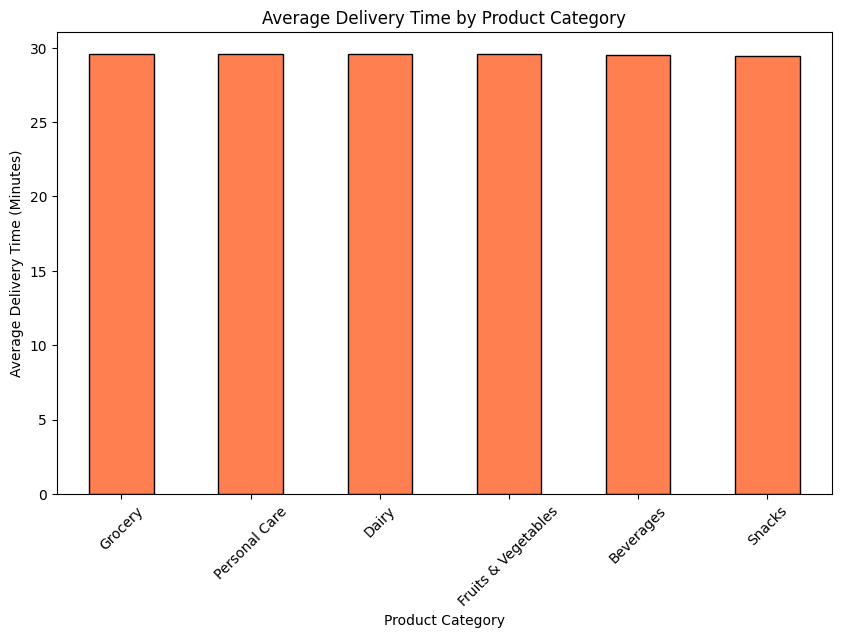

In [21]:
# Group by Product Category and calculate average delivery time
avg_delivery_time = df.groupby("Product Category")["Delivery Time (Minutes)"].mean().sort_values(ascending=False)

print("=== Average Delivery Time by Product Category (in Minutes) ===")
print(avg_delivery_time)

# Bar chart
plt.figure(figsize=(10,6))
avg_delivery_time.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Average Delivery Time by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Delivery Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

=== Maximum Order Value by Product Category ===
Product Category
Personal Care          2000
Grocery                1500
Beverages              1000
Dairy                   800
Fruits & Vegetables     700
Snacks                  500
Name: Order Value (INR), dtype: int64


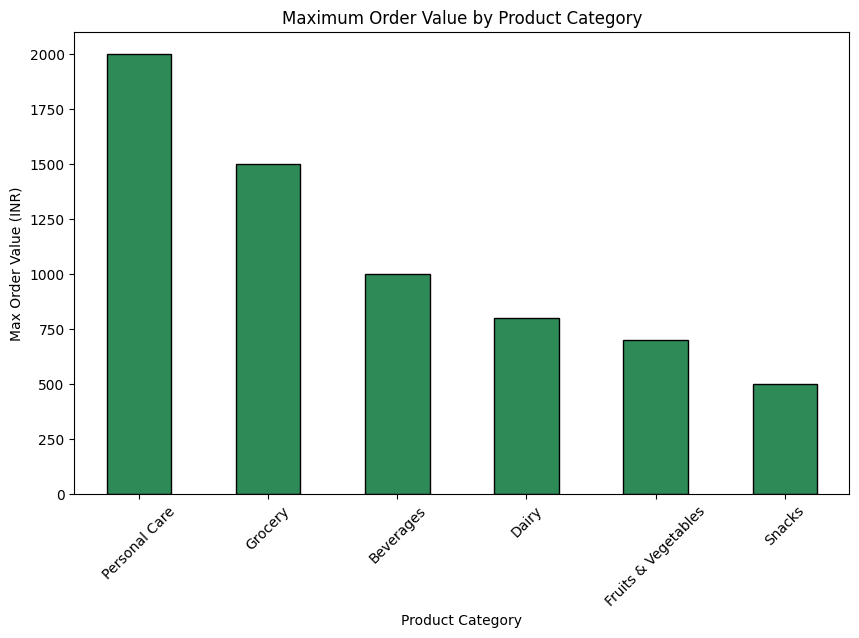

In [22]:
max_cost_by_category = df.groupby("Product Category")["Order Value (INR)"].max().sort_values(ascending=False)

print("=== Maximum Order Value by Product Category ===")
print(max_cost_by_category)

# Plot
plt.figure(figsize=(10,6))
max_cost_by_category.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title("Maximum Order Value by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Max Order Value (INR)")
plt.xticks(rotation=45)
plt.show()


=== Refund Requests by Platform ===
Platform
Blinkit             15353
Swiggy Instamart    15288
JioMart             15178
Name: Refund Requested, dtype: int64


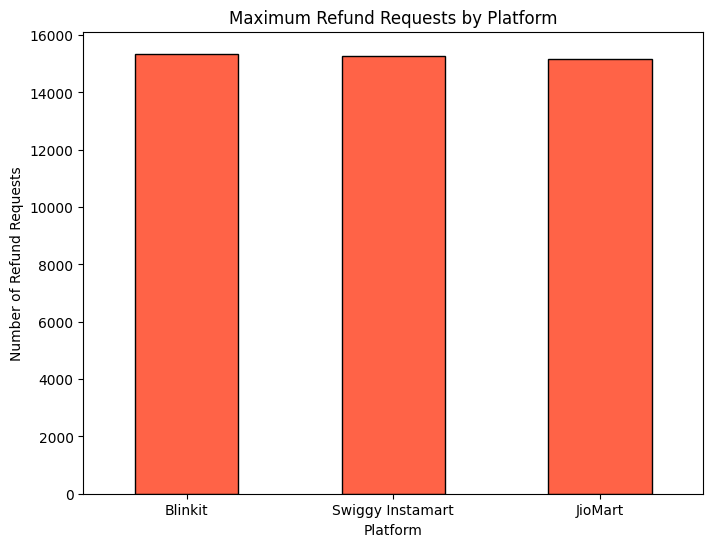

In [23]:
# Convert Refund Requested (Yes/No) to numeric (1/0)
df["Refund Requested"] = df["Refund Requested"].apply(lambda x: 1 if str(x).lower() == "yes" else 0)

# Count refunds by platform
refunds_by_platform = df.groupby("Platform")["Refund Requested"].sum().sort_values(ascending=False)

# Print summary
print("=== Refund Requests by Platform ===")
print(refunds_by_platform)

# Plot
plt.figure(figsize=(8,6))
refunds_by_platform.plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Maximum Refund Requests by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Refund Requests")
plt.xticks(rotation=0)
plt.show()


=== Feedback Summary ===
Feedback Category  Negative  Neutral  Positive  Total  Positive %
Platform                                                         
Blinkit                7566     7790     18068  33424   54.056965
JioMart                7578     7611     17938  33127   54.149183
Swiggy Instamart       7714     7684     18051  33449   53.965739


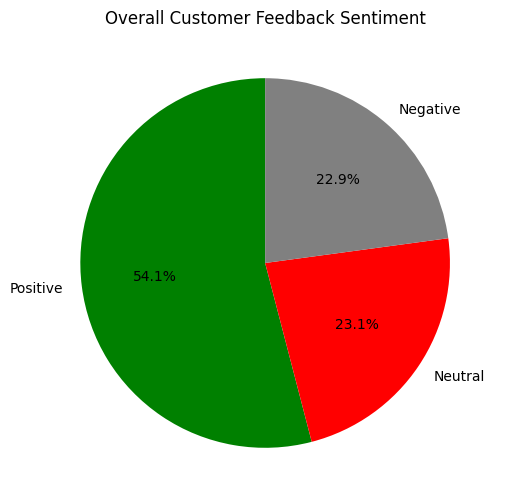

In [24]:

# Load your dataset (replace filename.csv with your actual file path if needed)
df = pd.read_csv('Ecommerce_Delivery_Analytics_New.csv')

# For now, assuming df already exists with column "Customer Feedback" and "Platform"

# Function to classify feedback
def classify_feedback(text):
    text = text.lower()
    positive_keywords = ["good", "great", "excellent", "fast", "reliable", "satisfied", "easy", "love", "fresh"]
    negative_keywords = ["horrible", "late", "not", "missing", "bad", "disappointed", "never"]
    
    if any(word in text for word in positive_keywords):
        return "Positive"
    elif any(word in text for word in negative_keywords):
        return "Negative"
    else:
        return "Neutral"

# Apply classification
df["Feedback Category"] = df["Customer Feedback"].apply(classify_feedback)

# Summarize per platform
summary = df.groupby(["Platform", "Feedback Category"]).size().unstack(fill_value=0)
summary["Total"] = summary.sum(axis=1)
summary["Positive %"] = (summary["Positive"] / summary["Total"]) * 100

print("=== Feedback Summary ===")
print(summary)

# --- Pie chart of overall sentiment ---
sentiment_counts = df["Feedback Category"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=["green","red","gray"])
plt.title("Overall Customer Feedback Sentiment")
plt.show()


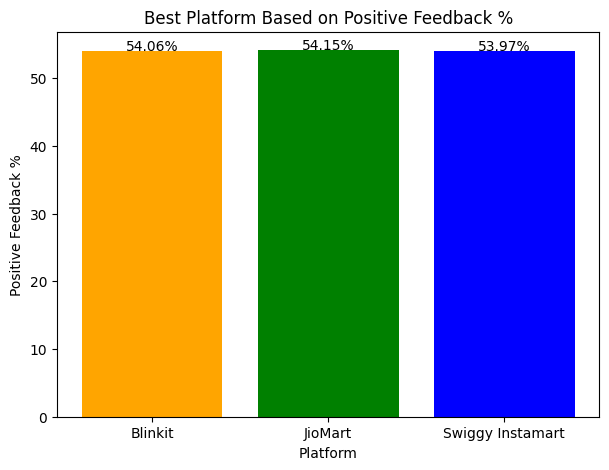

In [25]:

# Feedback summary
summary = {
    "Platform": ["Blinkit", "JioMart", "Swiggy Instamart"],
    "Positive %": [54.056965, 54.149183, 53.965739]
}

df_summary = pd.DataFrame(summary)

# Plot bar chart
plt.figure(figsize=(7,5))
bars = plt.bar(df_summary["Platform"], df_summary["Positive %"], color=["orange","green","blue"])
plt.title("Best Platform Based on Positive Feedback %")
plt.ylabel("Positive Feedback %")
plt.xlabel("Platform")

# Show values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}%", ha='center', fontsize=10)

plt.show()



RQ7 (Order Volume by Time Slot):
TimeSlot
Night        73567
Morning      11611
Afternoon     8095
Evening       6727
Name: Order ID, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_15344\2798211892.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rq7_slot.index, y=rq7_slot.values, palette="magma")


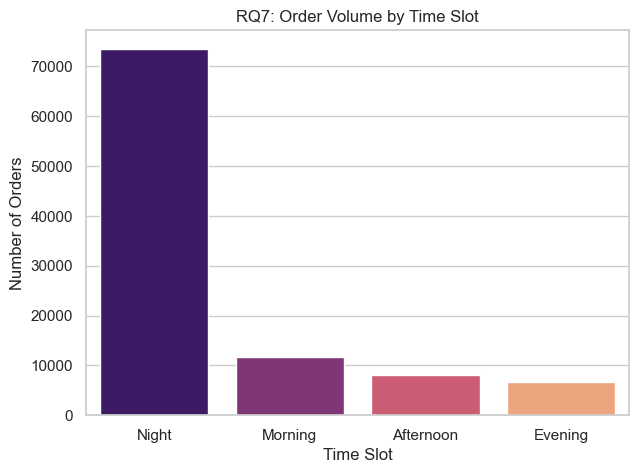

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime if not already
df["Order Date & Time"] = pd.to_datetime(df["Order Date & Time"], errors="coerce")

# Extract hour of the day
df["Hour"] = df["Order Date & Time"].dt.hour



# === Grouping into time slots (Morning, Afternoon, Evening, Night) ===
def get_time_slot(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["TimeSlot"] = df["Hour"].apply(get_time_slot)

rq7_slot = df.groupby("TimeSlot")["Order ID"].count().sort_values(ascending=False)
print("\nRQ7 (Order Volume by Time Slot):")
print(rq7_slot)

plt.figure(figsize=(7,5))
sns.barplot(x=rq7_slot.index, y=rq7_slot.values, palette="magma")
plt.title("RQ7: Order Volume by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Orders")
plt.show()


RQ8: Revenue by Category
Product Category
Personal Care          17395601
Grocery                14194055
Beverages               9086669
Dairy                   7610522
Fruits & Vegetables     6246517
Snacks                  4566076
Name: Order Value (INR), dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_15344\1405237692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rq8.index, y=rq8.values, palette="magma")


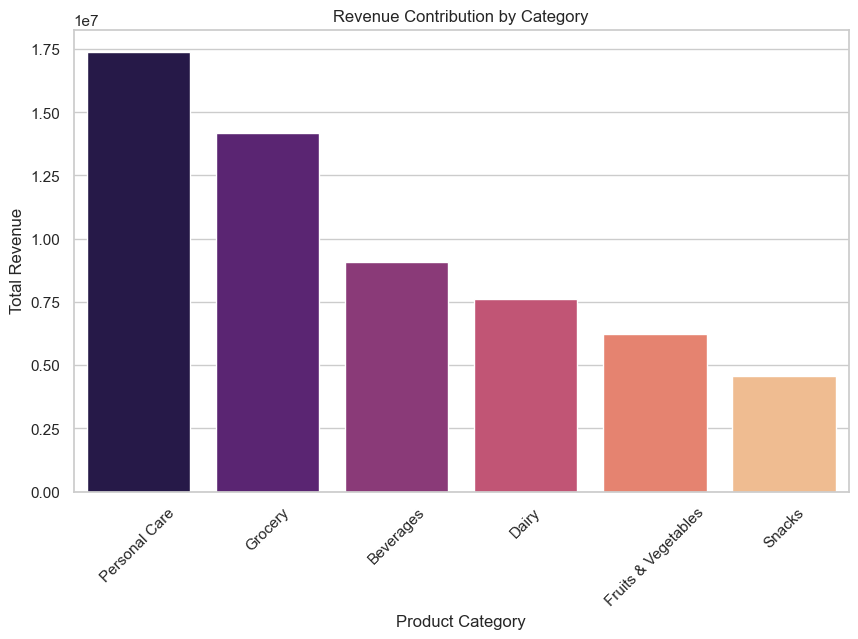

In [39]:
# === RQ8: Which category contributes the most revenue across platforms? ===
rq8 = df.groupby("Product Category")["Order Value (INR)"].sum().sort_values(ascending=False)
print("RQ8: Revenue by Category")
print(rq8)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=rq8.index, y=rq8.values, palette="magma")
plt.title("Revenue Contribution by Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()




In [42]:
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,positive_flag,Hour,TimeSlot
0,ORD000001,CUST2824,JioMart,2025-09-09 19:29:30,30,Fruits & Vegetables,382,"fast delivery, great service!",5,No,No,0,19.0,Evening
1,ORD000002,CUST1409,Blinkit,NaT,16,Dairy,279,quick and reliable!,5,No,No,0,NaN,Night
2,ORD000003,CUST5506,JioMart,2025-09-09 21:29:30,25,Beverages,599,items missing from order.,2,No,Yes,0,21.0,Night
3,ORD000004,CUST5012,JioMart,2025-09-09 19:29:30,42,Beverages,946,items missing from order.,2,Yes,Yes,0,19.0,Evening
4,ORD000005,CUST4657,Blinkit,NaT,30,Beverages,334,"fast delivery, great service!",5,No,No,0,NaN,Night


C:\Users\HP\AppData\Local\Temp\ipykernel_15344\3059753326.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Refund Requested"] = df["Refund Requested"].replace({"Yes": 1, "No": 0})
C:\Users\HP\AppData\Local\Temp\ipykernel_15344\3059753326.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rq10.index, y=rq10.values, palette="cubehelix")


RQ9: Refund Requests by Time Slot
TimeSlot
Night        33740
Morning       5317
Afternoon     3714
Evening       3048
Name: Refund Requested, dtype: int64


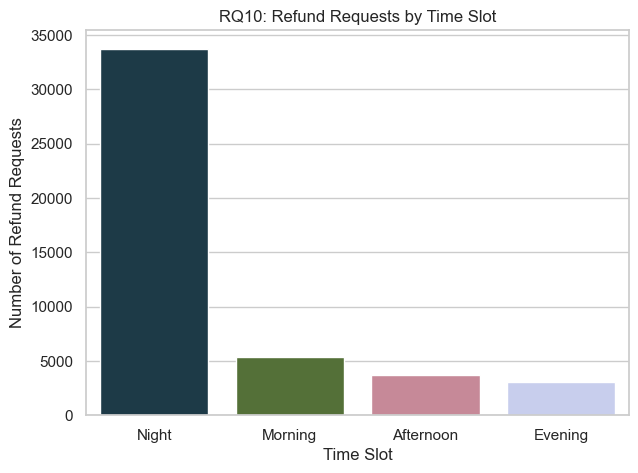

In [45]:

# === Step 1: Convert Order Date & Time to datetime ===
df["Order Date & Time"] = pd.to_datetime(df["Order Date & Time"], errors="coerce")

# Extract hour
df["Hour"] = df["Order Date & Time"].dt.hour

# Define time slots
def get_time_slot(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df["TimeSlot"] = df["Hour"].apply(get_time_slot)

# === Step 2: Clean Refund Requested column ===
# Replace Yes/No with 1/0
df["Refund Requested"] = df["Refund Requested"].replace({"Yes": 1, "No": 0})
df["Refund Requested"] = pd.to_numeric(df["Refund Requested"], errors="coerce")

# === Step 3: Group by Time Slot ===
rq10 = df.groupby("TimeSlot")["Refund Requested"].sum().sort_values(ascending=False)
print("RQ9: Refund Requests by Time Slot")
print(rq10)

# === Step 4: Plot ===
plt.figure(figsize=(7,5))
sns.barplot(x=rq10.index, y=rq10.values, palette="cubehelix")
plt.title("RQ10: Refund Requests by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Refund Requests")
plt.show()


RQ11: Category Preferences by Platform
Product Category  Beverages  Dairy  Fruits & Vegetables  Grocery  \
Platform                                                           
Blinkit                5593   5643                 5576     5586   
JioMart                5411   5586                 5546     5605   
Swiggy Instamart       5532   5628                 5510     5546   

Product Category  Personal Care  Snacks  
Platform                                 
Blinkit                    5463    5563  
JioMart                    5436    5543  
Swiggy Instamart           5634    5599  


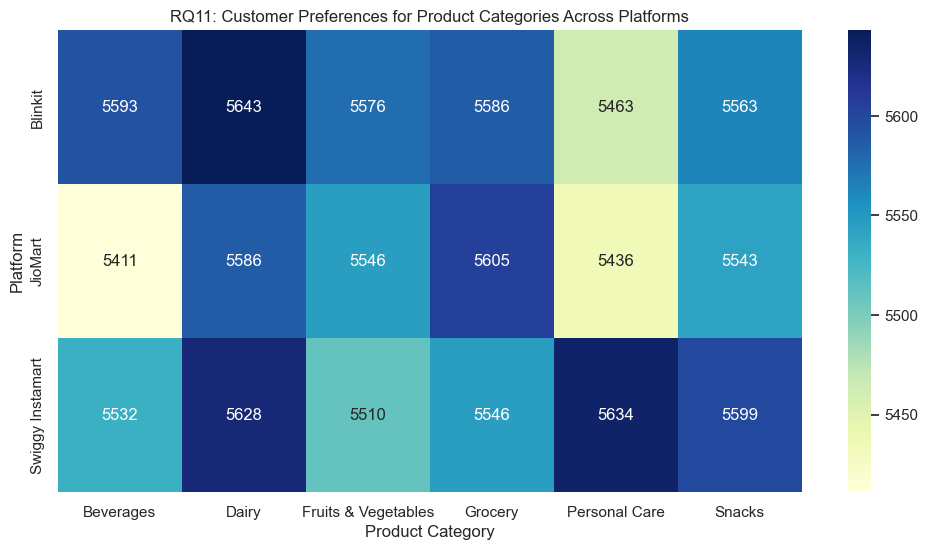

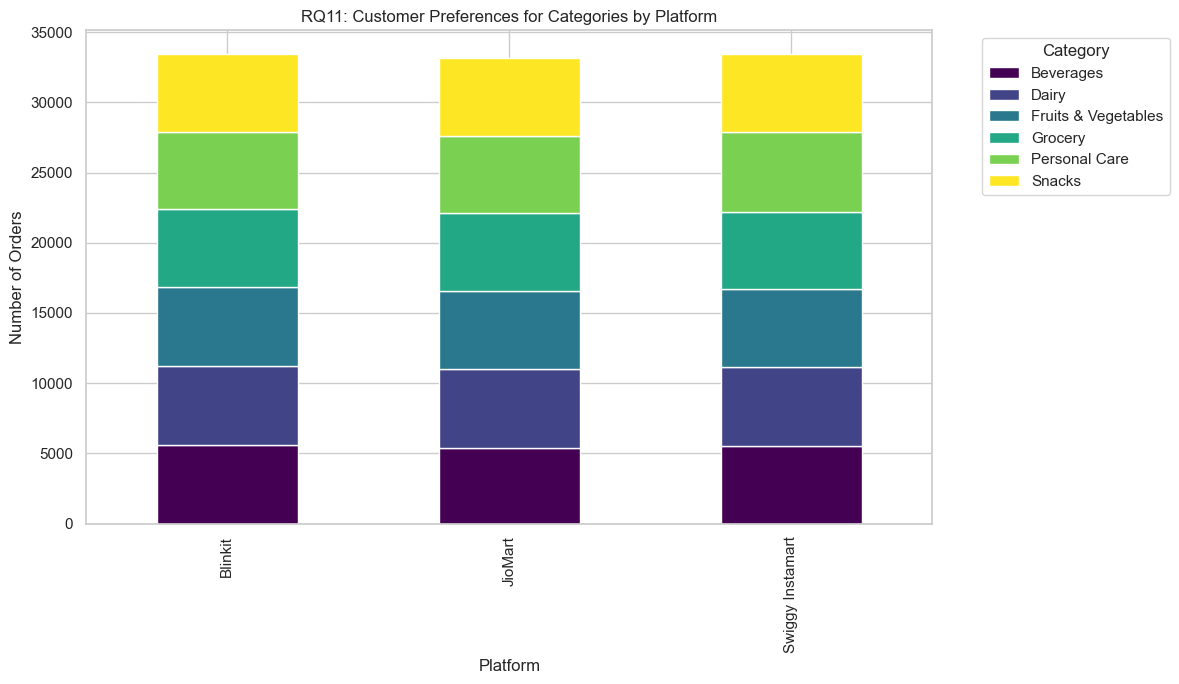

In [46]:

# === RQ10: Category Preferences by Platform ===
rq11 = pd.crosstab(df["Platform"], df["Product Category"])
print("RQ11: Category Preferences by Platform")
print(rq11)

# Heatmap visualization
plt.figure(figsize=(12,6))
sns.heatmap(rq11, annot=True, fmt="d", cmap="YlGnBu")
plt.title("RQ11: Customer Preferences for Product Categories Across Platforms")
plt.xlabel("Product Category")
plt.ylabel("Platform")
plt.show()

# Optional: stacked bar chart for platform-category distribution
rq11.plot(kind="bar", stacked=True, figsize=(12,7), colormap="viridis")
plt.title("RQ10: Customer Preferences for Categories by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Orders")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


=== KPI Summary ===
           Platform  avg_delivery  avg_rating  pos_feedback_pct
0           Blinkit     29.474898    3.233844         15.563667
1           JioMart     29.634498    3.245147         15.446615
2  Swiggy Instamart     29.499925    3.243415         15.575951


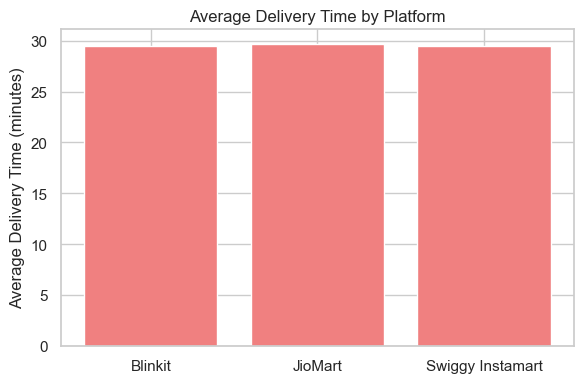

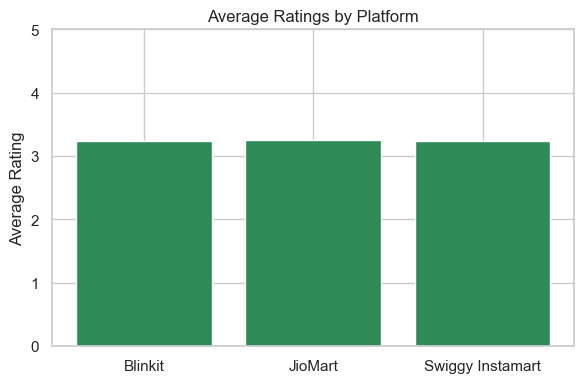

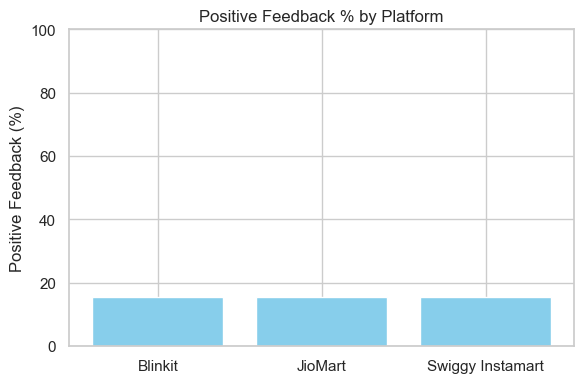


=== Final Platform Ranking ===
           Platform  avg_delivery  avg_rating  pos_feedback_pct  \
0  Swiggy Instamart     29.499925    3.243415         15.575951   
1           Blinkit     29.474898    3.233844         15.563667   
2           JioMart     29.634498    3.245147         15.446615   

   composite_score  rank  
0           0.8756     1  
1           0.6810     2  
2           0.3000     3  

Which Platform Is Best? — Data-Backed Conclusion

🏆 Overall winner: Swiggy Instamart
🥈 Runner-up: Blinkit
🥉 Third place: JioMart

Swiggy Instamart: avg delivery 29.50 min, avg rating 3.24/5, positive feedback 15.58%.
Blinkit: avg delivery 29.47 min, avg rating 3.23/5, positive feedback 15.56%.
JioMart: avg delivery 29.63 min, avg rating 3.25/5, positive feedback 15.45%.

Composite Score weights: Speed=50%, Rating=30%, Sentiment=20%.


In [47]:

# ==============================
# 1) Load Dataset
# ==============================
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")   # <-- replace with your file name

# ==============================
# 2) Clean / Preprocess
# ==============================
df["Customer Feedback"] = df["Customer Feedback"].astype(str).str.strip().str.lower()

df["positive_flag"] = df["Customer Feedback"].apply(
    lambda x: 1 if ("positive" in x or "good" in x or "satisfied" in x) else 0
)

# ==============================
# 3) Aggregate KPI Summary
# ==============================
summary = df.groupby("Platform").agg(
    avg_delivery=("Delivery Time (Minutes)", "mean"),
    avg_rating=("Service Rating", "mean"),
    pos_feedback_pct=("positive_flag", "mean")
).reset_index()

summary["pos_feedback_pct"] *= 100   # convert fraction → percentage
print("=== KPI Summary ===")
print(summary)

# ==============================
# 4) Visualization
# ==============================

plt.figure(figsize=(6,4))
plt.bar(summary["Platform"], summary["avg_delivery"], color="lightcoral")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Average Delivery Time by Platform")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(summary["Platform"], summary["avg_rating"], color="seagreen")
plt.ylabel("Average Rating")
plt.title("Average Ratings by Platform")
plt.ylim(0,5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(summary["Platform"], summary["pos_feedback_pct"], color="skyblue")
plt.ylabel("Positive Feedback (%)")
plt.title("Positive Feedback % by Platform")
plt.ylim(0,100)
plt.tight_layout()
plt.show()

# ==============================
# 5) Composite Score Calculation
# ==============================
def minmax(x):
    return (x - x.min()) / (x.max() - x.min()) if x.max()!=x.min() else 1

def minmax_inv(x):
    return (x.max() - x) / (x.max() - x.min()) if x.max()!=x.min() else 1

comp = summary.copy()
comp["speed_norm"] = minmax_inv(comp["avg_delivery"])
comp["rating_norm"] = minmax(comp["avg_rating"])
comp["sentiment_norm"] = minmax(comp["pos_feedback_pct"])

WEIGHTS = {"speed_norm":0.5, "rating_norm":0.3, "sentiment_norm":0.2}

comp["composite_score"] = (
    comp["speed_norm"]*WEIGHTS["speed_norm"]
  + comp["rating_norm"]*WEIGHTS["rating_norm"]
  + comp["sentiment_norm"]*WEIGHTS["sentiment_norm"]
).round(4)

comp["composite_score"] = comp["composite_score"].fillna(0)
comp = comp.sort_values("composite_score", ascending=False).reset_index(drop=True)
comp["rank"] = comp.index + 1

print("\n=== Final Platform Ranking ===")
print(comp[["Platform","avg_delivery","avg_rating","pos_feedback_pct","composite_score","rank"]])

# ==============================
# 6) Auto-Conclusion
# ==============================
best_platform = comp.loc[0, "Platform"]
runner_up = comp.loc[1, "Platform"]
third = comp.loc[2, "Platform"]

print("\nWhich Platform Is Best? — Data-Backed Conclusion\n")
print(f"🏆 Overall winner: {best_platform}")
print(f"🥈 Runner-up: {runner_up}")
print(f"🥉 Third place: {third}\n")

for _, row in comp.iterrows():
    print(f"{row['Platform']}: avg delivery {row['avg_delivery']:.2f} min, "
          f"avg rating {row['avg_rating']:.2f}/5, "
          f"positive feedback {row['pos_feedback_pct']:.2f}%.")

print("\nComposite Score weights: Speed=50%, Rating=30%, Sentiment=20%.")
